# Figure 1 and Figure 2: Correlations in Residual Data

**Alex B. Nielsen<sup>1,2</sup>, Alexander H. Nitz<sup>1,2</sup>, Collin Capano<sup>1,2</sup>, and Duncan A. Brown<sup>3</sup>**

 <sub>1. [Albert-Einstein-Institut, Max-Planck-Institut for Gravitationsphysik, D-30167 Hannover, Germany](http://www.aei.mpg.de/obs-rel-cos)</sub>  
 <sub>2. Leibniz Universitat Hannover, D-30167 Hannover, Germany</sub>  
 <sub>3. Department of Physics, Syracuse University, Syracuse, NY 13244, USA</sub>  

![Creative Commons License](https://i.creativecommons.org/l/by-sa/3.0/us/88x31.png "Creative Commons License")

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 United States License](http://creativecommons.org/licenses/by-sa/3.0/us/).

We encourage use of these data in derivative works. If you use the material provided here, please cite [our paper.]()

## Set up

Before running this notebook, you should run the [CreateResiduals](https://github.com/gwastro/gw150914_investigation/blob/master/CreateResiduals.ipynb) notebook to download the strain data and compute the maximum likelihood waveform.

In [1]:
%matplotlib inline
import os
import pylab, numpy
import res
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The plots are written to the directory specified here. You can change the value of `output_dir` to the path where you want the plots to be written.

In [2]:
output_dir = '../paper'
!mkdir -p {output_dir}

Read in the strain data.

In [3]:
strain = res.get_raw_strain()

## Compute correlation statistic for the different residuals

The data is bandpassed using the method explained in the LOSC notebooks. This bandpassing uses the GWOSC-provided method and is implemented in the function [`bandpass()`](https://github.com/gwastro/gw150914_investigation/blob/master/res.py#L172) provided in the module [res.py](https://github.com/gwastro/gw150914_investigation/blob/master/res.py) with these supplemental materials.

The actual correlation is computed by the function [`cross_correlation()`](https://github.com/gwastro/gw150914_investigation/blob/master/res.py#L198) in the module [res.py](https://github.com/gwastro/gw150914_investigation/blob/master/res.py). This is the cross correlation function used by Creswell et al. We copied this code directly from [the notebook provided by Creswell et al.](http://www.nbi.ku.dk/gravitational-waves/correlations.html) that is linked from the ["Comments on our paper, On the time lags of the LIGO signals."](http://www.nbi.ku.dk/gravitational-waves/gravitational-waves.html) The only changes we make here are to accomodate our Python data types. In the notebook provided by Creswell et al., the strain and times come from 2D numpy arrays that were loaded from text files. Here, ``h1`` and ``l1`` are `pycbc.TimeSeries` types.

### Correlation of the data containing the GW150914 signal

In [4]:
ts = res.bandpass(strain)
tau, corr = res.cross_correlation(ts['H1'], ts['L1'], res.corr_time)
print res.corr_near_ml(corr)

0.9649097534495938


### Correlation of the residuals with the LIGO-provided NR waveform subtracted

We subtract the numerical relativity data shown in Figure 1 of the [LIGO PRL](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102) and provided on the GWOSC [GW150914 page](https://www.gw-openscience.org/events/GW150914/) in the files [fig1-waveform-H.txt](https://www.gw-openscience.org/GW150914data/P150914/fig1-waveform-H.txt) and [fig1-waveform-L.txt](https://www.gw-openscience.org/GW150914data/P150914/fig1-waveform-L.txt). For convenience, these files are provided with these supplemental materials.

In [5]:
ts2 = res.bandpass(strain)
ts2 = res.get_nrsub_strain(ts2)
tau, corr_null = res.cross_correlation(ts2['H1'], ts2['L1'], res.corr_time)
print res.corr_near_ml(corr_null)

0.7986282699907443


### Correlation of the residuals with the maxiumum likelihood waveform subtracted

We subtract the maximum likelihood waveform computed based on the parameters measured by [Biwer et al.](https://arxiv.org/abs/1807.10312)

In [6]:
ts3 = res.get_residual_strain()
ts3 = res.bandpass(ts3)
tau, corr_null2 = res.cross_correlation(ts3['H1'], ts3['L1'], res.corr_time)
print res.corr_near_ml(corr_null2)

0.36923507769358327


### Correlation of the residuals provided by LIGO

We compute the correlation of the residuals shown in Figure 1 of the [LIGO PRL](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102) and provided on the GWOSC [GW150914 page](https://www.gw-openscience.org/events/GW150914/) in the files [fig1-residual-H.txt](https://www.gw-openscience.org/GW150914data/P150914/fig1-residual-H.txt) and [fig1-residual-L.txt](https://www.gw-openscience.org/GW150914data/P150914/fig1-residual-L.txt). For convenience, these files are provided with these supplemental materials.

In [7]:
ts4 = res.get_fig1_res()
tau4, corr_null3 = res.cross_correlation(ts4['H1'], ts4['L1'], 0.39)
print res.corr_near_ml(corr_null3)

0.805344433893299


### Correlation of the LIGO data

We compute the correlation of the strain data shown in Figure 1 of the [LIGO PRL](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102) and provided on the GWOSC [GW150914 page](https://www.gw-openscience.org/events/GW150914/) in the files [fig1-observed-H.txt](https://www.gw-openscience.org/GW150914data/P150914/fig1-observed-H.txt) and [fig1-observed-L.txt](https://www.gw-openscience.org/GW150914data/P150914/fig1-observed-L.txt). For convenience, these files are provided with these supplemental materials.

In [8]:
ts5 = res.get_fig1_observed()
tau5, corr_null5 = res.cross_correlation(ts5['H1'], ts5['L1'], 0.39)
print res.corr_near_ml(corr_null5)

0.9693216019431297


## Figure 1

Correlations between timeseries data of the Hanford and Livingston detectors that is displayed in Figure 1 of [Abbott et al.](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102). The correlations shown are for both the data containing the GW150914 signal in blue and the example residuals produced after subtracting a numerical relativity GR waveform in orange. As found in [Naselsky, Jackson and Liu](http://iopscience.iop.org/article/10.1088/1475-7516/2016/08/029/meta) and [Creswell et al.](http://iopscience.iop.org/article/10.1088/1475-7516/2017/08/013/meta), both the data containing the GW150914 signal and the example residuals show a significant correlation at a time shift corresponding to the time delay between the signal arriving at the Livingston detector and then arriving at the Hanford detector. The grey shaded region shows a region from 6.5 ms to 7.5 ms that contains the time shift between the Hanford and Livingston detectors for the signal observed by LIGO.

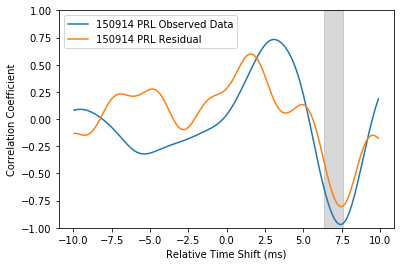

In [9]:
pylab.figure()
pylab.plot(tau5*1000, corr_null5, label='150914 PRL Observed Data')
pylab.plot(tau4*1000, corr_null3, label='150914 PRL Residual')
pylab.xlabel('Relative Time Shift (ms)')


pylab.legend()
_, _, s, e = res.indices_within_window(corr)
pylab.axvspan(s*1000, e*1000, alpha=0.3, color='grey', zorder=-1)
pylab.ylim(-1, 1)
pylab.ylabel('Correlation Coefficient')
pylab.savefig(os.path.join(output_dir,'fig1.pdf'), dpi=200)

## Figure 2

Correlation between the Hanford and Livingston data released by [GWOSC](https://www.gw-openscience.org/events/GW150914/) that has been band-passed and notched in the same way as used to produce Figure 1 of [Abbott et al.](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102). This data has an updated calibration compared to data used in [Abbott et al.](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102). Therefore the orange and blue curves are not exactly identical (although very similar) to those plotted in Fig. 1. The figure also contains the correlation for residuals constructed by subtracting the maximum likelihood model waveform found in [Biwer et al.](https://arxiv.org/abs/1807.10312). The correlations for these residuals are seen to be significantly lower than for the residuals constructed from the example numerical waveform from Fig. 1 of [Abbott et al.](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102).

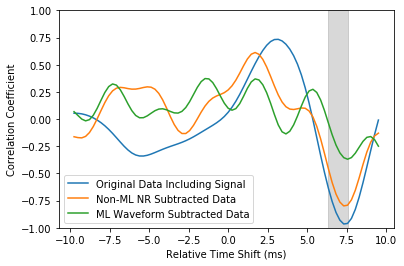

In [10]:
pylab.figure()
pylab.plot(tau*1000, corr, label='Original Data Including Signal')
pylab.plot(tau*1000, corr_null, label='Non-ML NR Subtracted Data')
pylab.plot(tau*1000, corr_null2, label='ML Waveform Subtracted Data')
pylab.xlabel('Relative Time Shift (ms)')

pylab.axvspan(s*1000, e*1000, alpha=0.3, color='grey', zorder=-1)
pylab.legend()
pylab.ylim(-1, 1)
pylab.ylabel('Correlation Coefficient')
pylab.savefig(os.path.join(output_dir,'fig2.pdf'), dpi=200)